In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [2]:
boston_data = load_boston()
boston_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [22]:
print(" Number of rows and columns in the data set ", boston_data.data.shape)
print(boston_data.feature_names)

 Number of rows and columns in the data set  (506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [21]:
boston_df =pd.DataFrame(boston_data.data)
boston_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
boston_df.columns = boston_data.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
boston_df['PRICE'] = boston_data.target

In [7]:
X = boston_df.drop('PRICE', axis=1)
lm = LinearRegression()
lm.fit(X, boston_df.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
print("Intercept: ", lm.intercept_)
print("Coefficient: ", lm.coef_)

Intercept:  36.4911032804
Coefficient:  [ -1.07170557e-01   4.63952195e-02   2.08602395e-02   2.68856140e+00
  -1.77957587e+01   3.80475246e+00   7.51061703e-04  -1.47575880e+00
   3.05655038e-01  -1.23293463e-02  -9.53463555e-01   9.39251272e-03
  -5.25466633e-01]


In [9]:
pd.DataFrame(list(zip(X.columns, lm.coef_)),columns= ['features','estimatedCoefficients'])

,features,estimatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [10]:
lm.predict(X)[0:5]

mseFull = np.mean((boston_df.PRICE - lm.predict(X)) ** 2)
print(mseFull)

21.897779217687486


In [11]:
#Train and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, boston_df.PRICE, test_size=0.3, random_state=42)
print(X_train)

         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
5     0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
116   0.13158   0.0  10.01   0.0  0.547  6.176   72.5  2.7301   6.0  432.0   
45    0.17142   0.0   6.91   0.0  0.448  5.682   33.8  5.1004   3.0  233.0   
16    1.05393   0.0   8.14   0.0  0.538  5.935   29.3  4.4986   4.0  307.0   
468  15.57570   0.0  18.10   0.0  0.580  5.926   71.0  2.9084  24.0  666.0   
360   4.54192   0.0  18.10   0.0  0.770  6.398   88.0  2.5182  24.0  666.0   
3     0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
405  67.92080   0.0  18.10   0.0  0.693  5.683  100.0  1.4254  24.0  666.0   
185   0.06047   0.0   2.46   0.0  0.488  6.153   68.8  3.2797   3.0  193.0   
60    0.14932  25.0   5.13   0.0  0.453  5.741   66.2  7.2254   8.0  284.0   
110   0.10793   0.0   8.56   0.0  0.520  6.195   54.4  2.7778   5.0  384.0   
321   0.18159   0.0   7.38   0.0  0.493  6.376   54.3  4.5404   

In [12]:
lm_tts = LinearRegression()
lm_tts.fit(X_train, Y_train)
print("Intercept: ", lm_tts.intercept_)
print("Coefficient: ", lm_tts.coef_)

Intercept:  31.6821485821
Coefficient:  [ -1.32774155e-01   3.57812335e-02   4.99454423e-02   3.12127706e+00
  -1.54698463e+01   4.04872721e+00  -1.07515901e-02  -1.38699758e+00
   2.42353741e-01  -8.69095363e-03  -9.11917342e-01   1.19435253e-02
  -5.48080157e-01]


In [15]:
pred_train = lm.predict(X_train)
pred_test  = lm.predict(X_test)
print("MSE for Y_train:", np.mean((Y_train - lm.predict(X_train)) ** 2))
print("MSE with Y_test:", np.mean((Y_test - lm.predict(X_test)) ** 2))

MSE for Y_train: 22.86266796675359
MSE with Y_test: 19.650604104730895


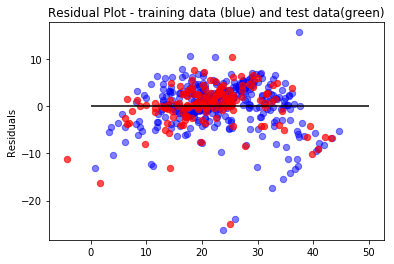

In [17]:
plt.scatter(pred_train,pred_train - Y_train, c = 'b',s=40,alpha=0.5)
plt.scatter(pred_test,pred_test - Y_test, c = 'r',s=40,alpha=0.7)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title('Residual Plot - training data (blue) and test data(green)')
plt.ylabel('Residuals')